In [12]:
from fastai.vision.all import *

In [13]:
def label_func(fname):
    return fname.name.split("_")[0]

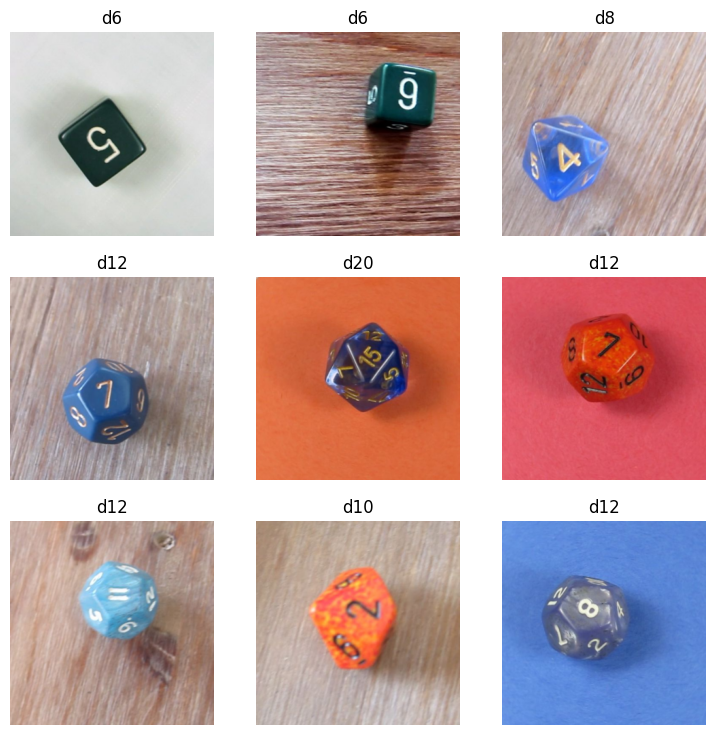

In [14]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=label_func,
    splitter=RandomSplitter(),
    item_tfms=Resize(300),
)
dls = dblock.dataloaders("./training-data/train")
dls.show_batch()

In [15]:
learn = Learner(dls, xresnet50(n_out=dls.c), opt_func=ranger,
                loss_func=LabelSmoothingCrossEntropyFlat(),
                metrics=accuracy)

In [16]:
learn.fit_flat_cos(5, 8e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.841157,1.293342,0.727241,06:59
1,0.680633,0.781408,0.877801,06:57
2,0.544940,0.483836,0.999650,06:50
3,0.495162,0.556448,0.976541,54:37
4,0.445726,0.434536,1.000000,1:06:29


In [17]:
learn.predict('./training-data/valid/d20/d20_off-angle_0345.jpg')

('d20', tensor(2), tensor([0.0148, 0.0113, 0.9452, 0.0114, 0.0107, 0.0066]))

In [19]:
learn.save('./5epoch')

Path('models/5epoch.pth')